In [59]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/meta-kaggle/KernelTags.csv
/kaggle/input/meta-kaggle/ModelVariations.csv
/kaggle/input/meta-kaggle/KernelVersionCompetitionSources.csv
/kaggle/input/meta-kaggle/Datasets.csv
/kaggle/input/meta-kaggle/KernelVersionKernelSources.csv
/kaggle/input/meta-kaggle/KernelVotes.csv
/kaggle/input/meta-kaggle/Submissions.csv
/kaggle/input/meta-kaggle/KernelLanguages.csv
/kaggle/input/meta-kaggle/Users.csv
/kaggle/input/meta-kaggle/ForumMessageVotes.csv
/kaggle/input/meta-kaggle/Competitions.csv
/kaggle/input/meta-kaggle/DatasetTaskSubmissions.csv
/kaggle/input/meta-kaggle/UserAchievements.csv
/kaggle/input/meta-kaggle/UserOrganizations.csv
/kaggle/input/meta-kaggle/Teams.csv
/kaggle/input/meta-kaggle/UserFollowers.csv
/kaggle/input/meta-kaggle/CompetitionTags.csv
/kaggle/input/meta-kaggle/Kernels.csv
/kaggle/input/meta-kaggle/Organizations.csv
/kaggle/input/meta-kaggle/Datasources.csv
/kaggle/input/meta-kaggle/ModelVersions.csv
/kaggle/input/meta-kaggle/ForumTopics.csv
/kaggle/input/

# Kaggle Notebook: Meta Kaggle Competitions Analysis
# ----------------------------------------------------
# Analyzing trends, patterns, and dynamics within Kaggle competitions,
# using the available Meta Kaggle datasets.

# ====================================================
# 📚 Section 1: Setup and Libraries
# ====================================================

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

# ====================================================
# 📂 Section 2: Load Meta Kaggle Datasets
# ====================================================

In [61]:
# Create DataFrame 
competitions = pd.read_csv('/kaggle/input/meta-kaggle/Competitions.csv', low_memory=False)
tags = pd.read_csv('/kaggle/input/meta-kaggle/CompetitionTags.csv', low_memory=False)
tag_names = pd.read_csv('/kaggle/input/meta-kaggle/Tags.csv', low_memory=False)
submissions = pd.read_csv('/kaggle/input/meta-kaggle/Submissions.csv', low_memory=False)
teams = pd.read_csv('/kaggle/input/meta-kaggle/Teams.csv', low_memory=False)


# ====================================================
# 🔍 Section 3: Overview of Competitions
# ====================================================

In [62]:
print(competitions.columns.tolist())
print("Number of competitions:", len(competitions))
#display(competitions[['Id','Title','RewardQuantity','EnabledDate','Deadline']].head())
competitions['DeadlineDate'] = pd.to_datetime(competitions['DeadlineDate'])

print("\nCompetitions date range:")
print(competitions['EnabledDate'].min(), "to", competitions['EnabledDate'].max())

competitions['EnabledDate'] = pd.to_datetime(competitions['EnabledDate'])
competitions['DeadlineDate'] = pd.to_datetime(competitions['DeadlineDate'])

display(competitions[['Id','Title','RewardQuantity','EnabledDate','DeadlineDate']].head())


['Id', 'Slug', 'Title', 'Subtitle', 'HostSegmentTitle', 'ForumId', 'OrganizationId', 'EnabledDate', 'DeadlineDate', 'ProhibitNewEntrantsDeadlineDate', 'TeamMergerDeadlineDate', 'TeamModelDeadlineDate', 'ModelSubmissionDeadlineDate', 'FinalLeaderboardHasBeenVerified', 'HasKernels', 'OnlyAllowKernelSubmissions', 'HasLeaderboard', 'LeaderboardPercentage', 'ScoreTruncationNumDecimals', 'EvaluationAlgorithmAbbreviation', 'EvaluationAlgorithmName', 'EvaluationAlgorithmDescription', 'EvaluationAlgorithmIsMax', 'MaxDailySubmissions', 'NumScoredSubmissions', 'MaxTeamSize', 'BanTeamMergers', 'EnableTeamModels', 'RewardType', 'RewardQuantity', 'NumPrizes', 'UserRankMultiplier', 'CanQualifyTiers', 'TotalTeams', 'TotalCompetitors', 'TotalSubmissions', 'LicenseName', 'Overview', 'Rules', 'DatasetDescription', 'TotalCompressedBytes', 'TotalUncompressedBytes', 'ValidationSetName', 'ValidationSetValue', 'EnableSubmissionModelHashes', 'EnableSubmissionModelAttachments', 'HostName', 'CompetitionTypeId']


,Id,Title,RewardQuantity,EnabledDate,DeadlineDate
0,2408,Forecast Eurovision Voting,1000.0,2010-04-07 07:57:43,2010-05-25 18:00:00
1,2435,Predict HIV Progression,500.0,2010-04-27 21:29:09,2010-08-02 12:32:00
2,2438,World Cup 2010 - Take on the Quants,100.0,2010-06-03 08:08:08,2010-06-11 13:29:00
3,2439,INFORMS Data Mining Contest 2010,0.0,2010-06-21 21:53:25,2010-10-10 02:28:00
4,2442,World Cup 2010 - Confidence Challenge,100.0,2010-06-03 08:08:08,2010-06-11 13:28:00


# ====================================================
# 📈 Section 4: Trends Over Time
# ====================================================

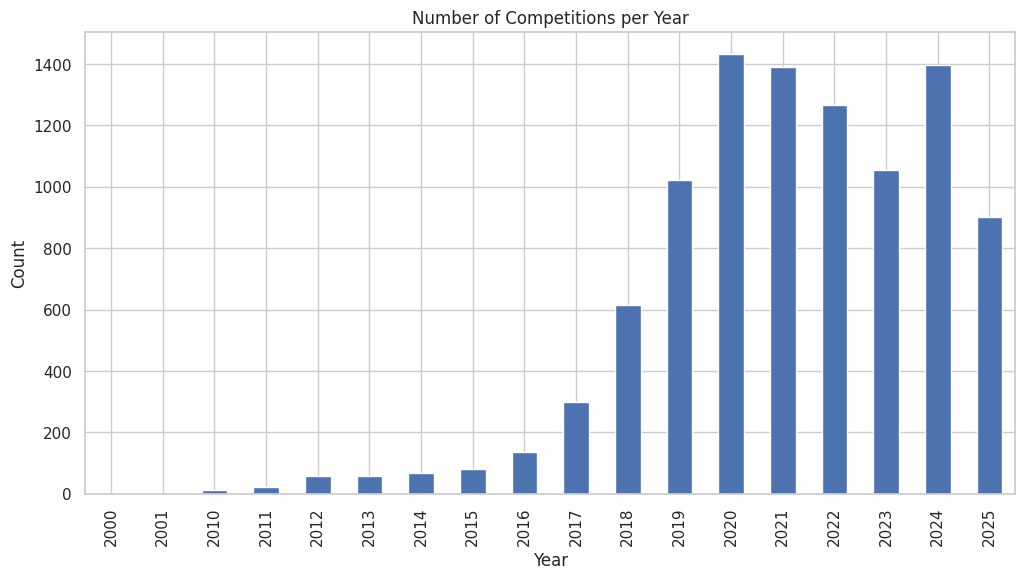

In [63]:
competitions['Year'] = competitions['EnabledDate'].dt.year
competitions_per_year = competitions.groupby('Year').size()

plt.figure()
competitions_per_year.plot(kind='bar')
plt.title('Number of Competitions per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


# ====================================================
# 🏷️ Section 5: Competition Tags
# ====================================================

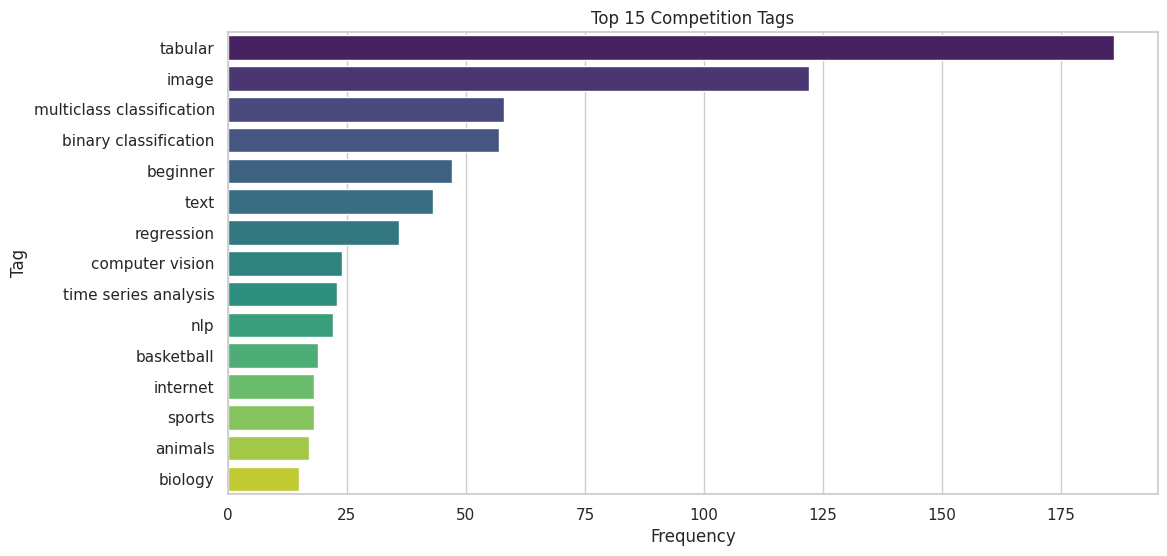

In [64]:
# Join tags
comp_tags = tags.merge(tag_names, left_on='TagId', right_on='Id')
comp_tags = comp_tags.merge(competitions[['Id','Title']], left_on='CompetitionId', right_on='Id')

top_tags = comp_tags['Name'].value_counts().head(15)

plt.figure()
sns.barplot(y=top_tags.index, x=top_tags.values, palette="viridis")
plt.title('Top 15 Competition Tags')
plt.xlabel('Frequency')
plt.ylabel('Tag')
plt.show()

# ====================================================
# 👥 Section 6: Participation Dynamics
# ====================================================

Submissions columns: ['Id', 'SubmittedUserId', 'TeamId', 'SourceKernelVersionId', 'SubmissionDate', 'ScoreDate', 'IsAfterDeadline', 'IsSelected', 'PublicScoreLeaderboardDisplay', 'PublicScoreFullPrecision', 'PrivateScoreLeaderboardDisplay', 'PrivateScoreFullPrecision']
Teams columns: ['Id', 'CompetitionId', 'TeamLeaderId', 'TeamName', 'ScoreFirstSubmittedDate', 'LastSubmissionDate', 'PublicLeaderboardSubmissionId', 'PrivateLeaderboardSubmissionId', 'IsBenchmark', 'Medal', 'MedalAwardDate', 'PublicLeaderboardRank', 'PrivateLeaderboardRank', 'WriteUpForumTopicId']


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


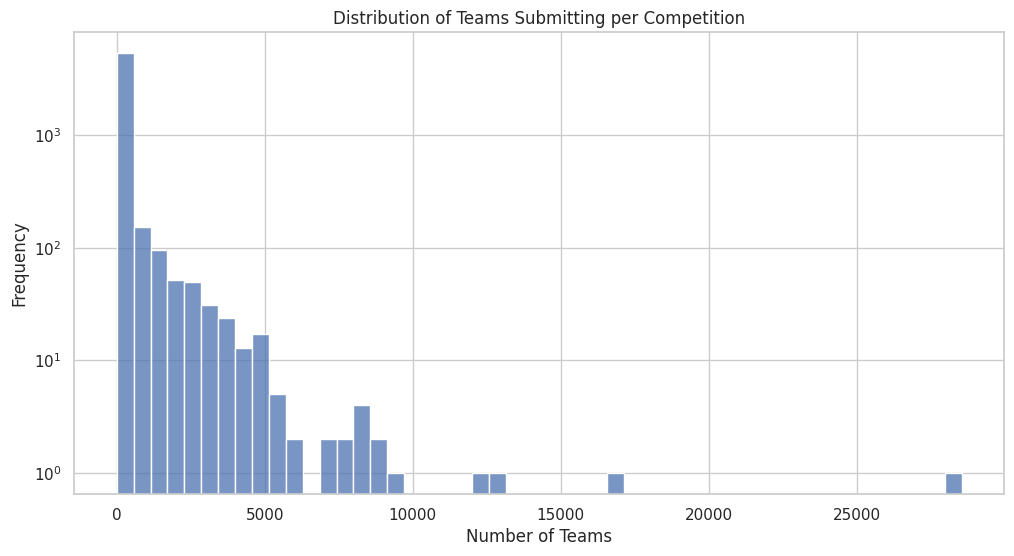


Top 10 Competitions by Number of Teams Submitting:


,Title,NumTeamsSubmitting
186,Bike Sharing Demand,28552.0
862,Home Credit Default Risk,16696.0
376,Dogs vs. Cats Redux: Kernels Edition,13015.0
1046,Santander Customer Transaction Prediction,12443.0
313,Santander Customer Satisfaction,9306.0
1696,IEEE-CIS Fraud Detection,8902.0
729,Toxic Comment Classification Challenge,8818.0
194,Bag of Words Meets Bags of Popcorn,8507.0
276,Rossmann Store Sales,8480.0
567,Porto Seguro’s Safe Driver Prediction,8324.0


In [65]:

# 1️⃣ First, inspect columns to confirm
print("Submissions columns:", submissions.columns.tolist())
print("Teams columns:", teams.columns.tolist())

# 2️⃣ Prepare Teams dataframe with CompetitionId
teams_subset = teams[['Id','CompetitionId']].rename(columns={'Id':'TeamId'})

# 3️⃣ Merge submissions with teams to get CompetitionId for each submission
submissions_with_comp = submissions.merge(
    teams_subset,
    how='left',
    on='TeamId'
)

# 4️⃣ Count unique teams per competition
submission_counts = submissions_with_comp.groupby('CompetitionId')['TeamId'].nunique().reset_index()
submission_counts.rename(columns={'TeamId':'NumTeamsSubmitting'}, inplace=True)

# 5️⃣ Merge into competitions
competitions = competitions.merge(
    submission_counts,
    left_on='Id',
    right_on='CompetitionId',
    how='left'
)

# 6️⃣ Plot distribution
plt.figure()
sns.histplot(competitions['NumTeamsSubmitting'].dropna(), bins=50, log_scale=(False, True))
plt.title('Distribution of Teams Submitting per Competition')
plt.xlabel('Number of Teams')
plt.ylabel('Frequency')
plt.show()

# 7️⃣ Show top competitions by participation
top_participation = competitions.sort_values(
    'NumTeamsSubmitting',
    ascending=False
)[['Title','NumTeamsSubmitting']].head(10)

print("\nTop 10 Competitions by Number of Teams Submitting:")
display(top_participation)


# ====================================================
# 🏆 Section 7: Submissions Dynamics
# ====================================================

Before dropping NaNs: (16082580, 13)
NaNs in CompetitionId: 0
CompetitionId unique: [ 2435  2408  2439 ... 91715 91716 91717]
subs_per_comp:
    CompetitionId  TotalSubmissions
0           2408                22
1           2435              1374
2           2439              1504
3           2442                63
4           2445              3025
Columns before dropping: Index(['Id', 'Slug', 'Title', 'Subtitle', 'HostSegmentTitle', 'ForumId',
       'OrganizationId', 'EnabledDate', 'DeadlineDate',
       'ProhibitNewEntrantsDeadlineDate', 'TeamMergerDeadlineDate',
       'TeamModelDeadlineDate', 'ModelSubmissionDeadlineDate',
       'FinalLeaderboardHasBeenVerified', 'HasKernels',
       'OnlyAllowKernelSubmissions', 'HasLeaderboard', 'LeaderboardPercentage',
       'ScoreTruncationNumDecimals', 'EvaluationAlgorithmAbbreviation',
       'EvaluationAlgorithmName', 'EvaluationAlgorithmDescription',
       'EvaluationAlgorithmIsMax', 'MaxDailySubmissions',
       'NumScoredSubmissions'

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


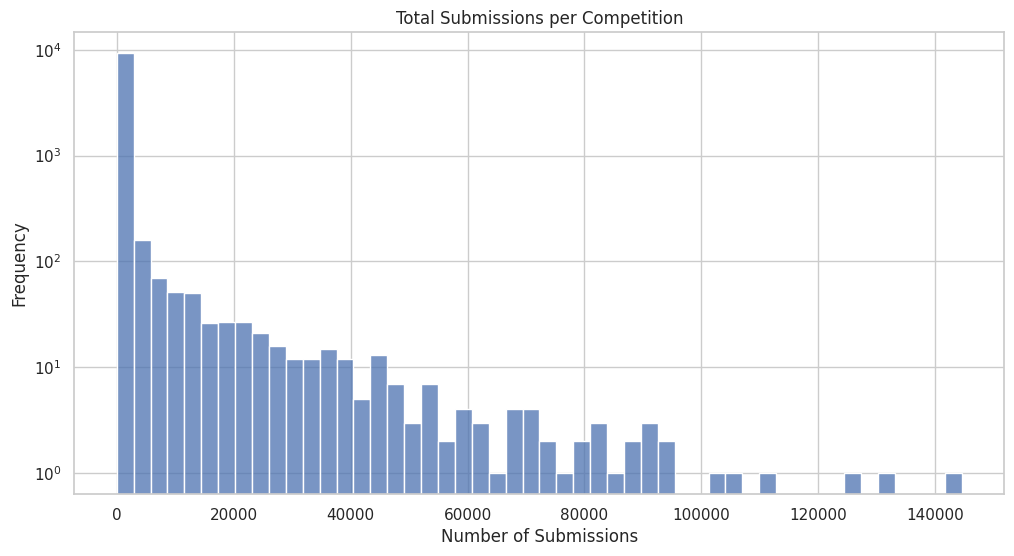

In [66]:
# Ensure types
teams['Id'] = teams['Id'].astype(str)
submissions['TeamId'] = submissions['TeamId'].astype(str)

# Merge submissions with teams to get CompetitionId
teams_subset = teams[['Id', 'CompetitionId']].rename(columns={'Id': 'TeamId'})

submissions_with_comp = submissions.merge(
    teams_subset,
    on='TeamId',
    how='left',
    validate='many_to_one'
)
print("Before dropping NaNs:", submissions_with_comp.shape)
print("NaNs in CompetitionId:", submissions_with_comp['CompetitionId'].isna().sum())
print("CompetitionId unique:", submissions_with_comp['CompetitionId'].unique())

# Drop nulls and ensure int type
submissions_with_comp = submissions_with_comp.dropna(subset=['CompetitionId'])
submissions_with_comp['CompetitionId'] = submissions_with_comp['CompetitionId'].astype(int)

# Group by CompetitionId to get total submissions
subs_per_comp = (
    submissions_with_comp.groupby('CompetitionId')
    .size()
    .reset_index(name='TotalSubmissions')
)

print("subs_per_comp:\n", subs_per_comp.head())

# Ensure correct type for merge
competitions['Id'] = competitions['Id'].astype(int)

# Merge
competitions = competitions.merge(
    subs_per_comp,
    left_on='Id',
    right_on='CompetitionId',
    how='left'
)

print("Columns before dropping:", competitions.columns)

# Recover 'TotalSubmissions' if needed
if 'TotalSubmissions' not in competitions.columns:
    if 'TotalSubmissions_x' in competitions.columns:
        competitions['TotalSubmissions'] = competitions['TotalSubmissions_x']
    elif 'TotalSubmissions_y' in competitions.columns:
        competitions['TotalSubmissions'] = competitions['TotalSubmissions_y']

# Now drop other _x/_y columns, excluding TotalSubmissions
columns_to_drop = [
    col for col in competitions.columns 
    if (col.endswith('_x') or col.endswith('_y')) and col not in ['TotalSubmissions_x', 'TotalSubmissions_y']
]
competitions.drop(columns=columns_to_drop, inplace=True)

# Also drop the original TotalSubmissions_x/y if retained
competitions.drop(columns=[col for col in ['TotalSubmissions_x', 'TotalSubmissions_y'] if col in competitions.columns], inplace=True)

# Drop right-hand CompetitionId if exists (to keep only 'Id')
if 'CompetitionId' in competitions.columns:
    competitions.drop(columns=['CompetitionId'], inplace=True)

# Confirm TotalSubmissions is present
print("Competitions after merge:", competitions.columns)
#print(competitions.head())

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.histplot(competitions['TotalSubmissions'].dropna(), bins=50, log_scale=(False, True))
plt.title('Total Submissions per Competition')
plt.xlabel('Number of Submissions')
plt.ylabel('Frequency')
plt.show()


# ====================================================
# 🌟 Section 8: Prize Analysis
# ====================================================

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


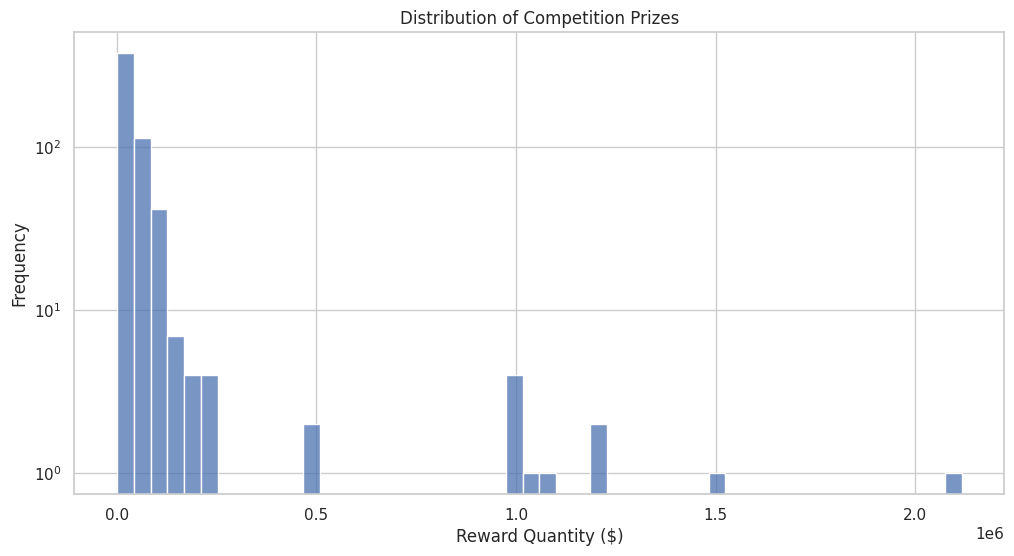

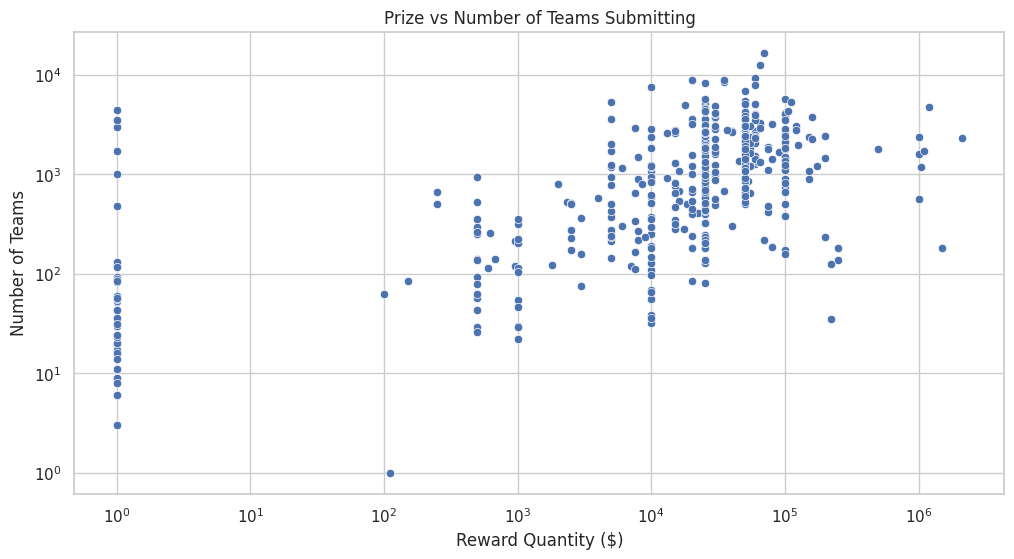

In [67]:
# Filter to competitions with a positive prize
prize_data = competitions[competitions['RewardQuantity'] > 0]

plt.figure()
sns.histplot(prize_data['RewardQuantity'], bins=50, log_scale=(False, True))
plt.title('Distribution of Competition Prizes')
plt.xlabel('Reward Quantity ($)')
plt.ylabel('Frequency')
plt.show()

# Correlation between prize and number of teams
plt.figure()
sns.scatterplot(x='RewardQuantity', y='NumTeamsSubmitting', data=prize_data)
plt.title('Prize vs Number of Teams Submitting')
plt.xlabel('Reward Quantity ($)')
plt.ylabel('Number of Teams')
plt.xscale('log')
plt.yscale('log')
plt.show()

# ====================================================
# ✅ Section 9: Kernel Usage Analysis
# ====================================================

   HasKernels  OnlyAllowKernelSubmissions  Count
0        True                       False   8973
1       False                       False    675
2        True                        True    165


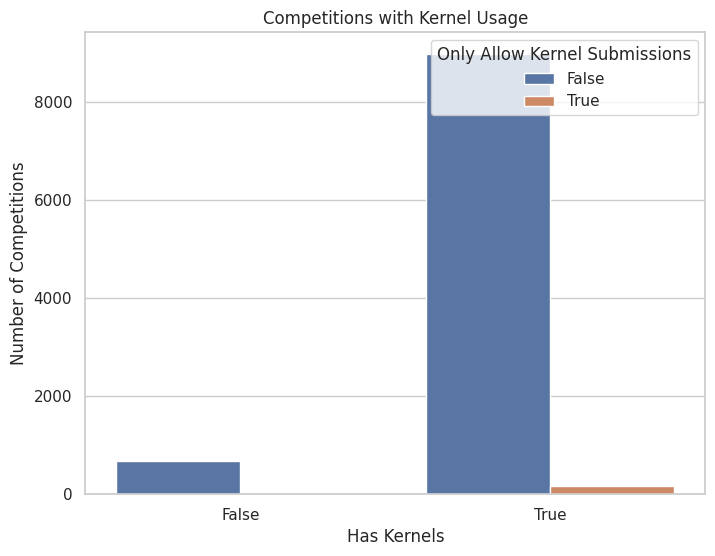

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count competitions by kernel settings
kernel_usage = competitions[['HasKernels', 'OnlyAllowKernelSubmissions']].value_counts().reset_index(name='Count')

print(kernel_usage)

# Plot bar chart
plt.figure(figsize=(8,6))
sns.barplot(
    data=kernel_usage,
    x='HasKernels',
    y='Count',
    hue='OnlyAllowKernelSubmissions'
)
plt.xlabel('Has Kernels')
plt.ylabel('Number of Competitions')
plt.title('Competitions with Kernel Usage')
plt.legend(title='Only Allow Kernel Submissions')
plt.show()


# ====================================================
# ✅ Section 10: Forum Activity Analysis
# ====================================================

Columns before processing: ['Id', 'Slug', 'Title', 'Subtitle', 'HostSegmentTitle', 'ForumId', 'OrganizationId', 'EnabledDate', 'DeadlineDate', 'ProhibitNewEntrantsDeadlineDate', 'TeamMergerDeadlineDate', 'TeamModelDeadlineDate', 'ModelSubmissionDeadlineDate', 'FinalLeaderboardHasBeenVerified', 'HasKernels', 'OnlyAllowKernelSubmissions', 'HasLeaderboard', 'LeaderboardPercentage', 'ScoreTruncationNumDecimals', 'EvaluationAlgorithmAbbreviation', 'EvaluationAlgorithmName', 'EvaluationAlgorithmDescription', 'EvaluationAlgorithmIsMax', 'MaxDailySubmissions', 'NumScoredSubmissions', 'MaxTeamSize', 'BanTeamMergers', 'EnableTeamModels', 'RewardType', 'RewardQuantity', 'NumPrizes', 'UserRankMultiplier', 'CanQualifyTiers', 'TotalTeams', 'TotalCompetitors', 'LicenseName', 'Overview', 'Rules', 'DatasetDescription', 'TotalCompressedBytes', 'TotalUncompressedBytes', 'ValidationSetName', 'ValidationSetValue', 'EnableSubmissionModelHashes', 'EnableSubmissionModelAttachments', 'HostName', 'CompetitionTy

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


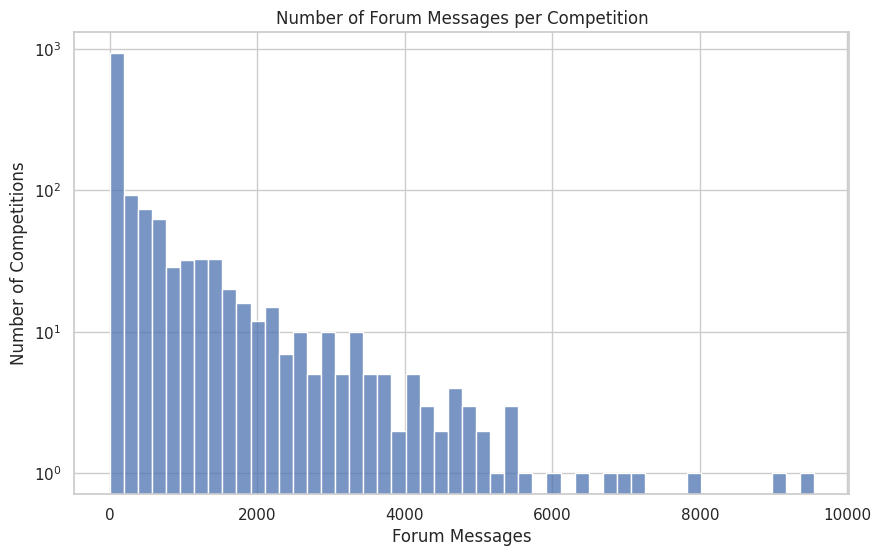

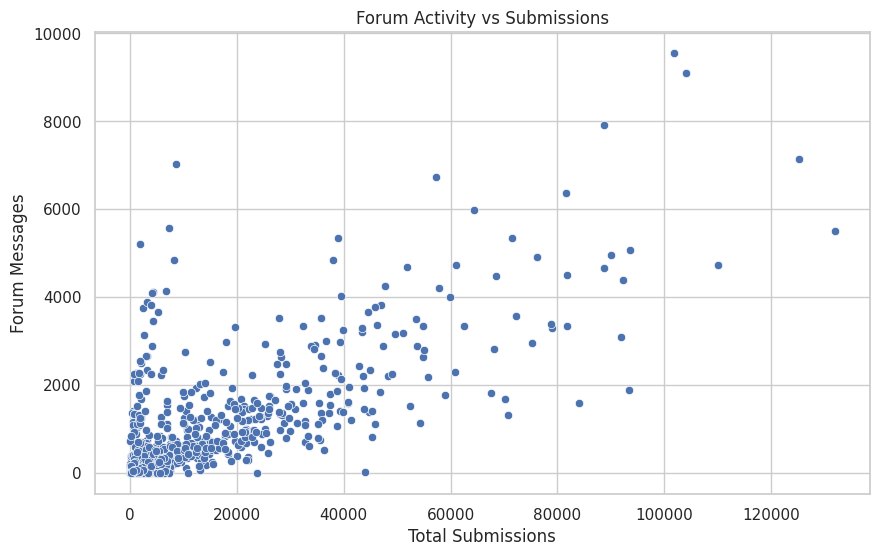

In [69]:
forums = pd.read_csv('/kaggle/input/meta-kaggle/Forums.csv')
forum_topics = pd.read_csv('/kaggle/input/meta-kaggle/ForumTopics.csv')
forum_messages = pd.read_csv('/kaggle/input/meta-kaggle/ForumMessages.csv')
forum_votes = pd.read_csv('/kaggle/input/meta-kaggle/ForumMessageVotes.csv')
forum_reactions = pd.read_csv('/kaggle/input/meta-kaggle/ForumMessageReactions.csv')

# Merge messages with topics to get ForumId
forum_messages = forum_messages.merge(
    forum_topics[['Id', 'ForumId']].rename(columns={'Id': 'ForumTopicId'}),
    on='ForumTopicId',
    how='left'
)

# Messages per forum
messages_per_forum = forum_messages.groupby('ForumId').size().reset_index(name='NumMessages')
# Confirm TotalSubmissions is present
# print("Competitions after merge:", competitions.columns)
# Topics per forum
topics_per_forum = forum_topics.groupby('ForumId').size().reset_index(name='NumTopics')

# Votes per forum
votes_with_forum = forum_votes.merge(
    forum_messages[['Id', 'ForumId']].rename(columns={'Id': 'ForumMessageId'}),
    on='ForumMessageId',
    how='left'
)
votes_per_forum = votes_with_forum.groupby('ForumId').size().reset_index(name='NumVotes')

# Reactions per forum
reactions_with_forum = forum_reactions.merge(
    forum_messages[['Id', 'ForumId']].rename(columns={'Id': 'ForumMessageId'}),
    on='ForumMessageId',
    how='left'
)
reactions_per_forum = reactions_with_forum.groupby('ForumId').size().reset_index(name='NumReactions')

# Combine all forum metrics
forum_stats = messages_per_forum \
    .merge(topics_per_forum, on='ForumId', how='outer') \
    .merge(votes_per_forum, on='ForumId', how='outer') \
    .merge(reactions_per_forum, on='ForumId', how='outer') \
    .fillna(0)

competitions = competitions.merge(
    forum_stats,
    on='ForumId',
    how='left'
)

# Print current columns
print("Columns before processing:", competitions.columns.tolist())

# Identify all columns ending in _x and _y
suffix_cols = [col for col in competitions.columns if col.endswith('_x') or col.endswith('_y')]

# Extract base column names (e.g., from NumVotes_x → NumVotes)
base_names = set(re.sub(r'_(x|y)$', '', col) for col in suffix_cols)

# Loop through base names
for base in base_names:
    col_x = f"{base}_x"
    col_y = f"{base}_y"
    
    if col_x in competitions.columns and col_y in competitions.columns:
        # If base column doesn't already exist, create it from _x
        if base not in competitions.columns:
            competitions[base] = competitions[col_x]
        
        # Drop both _x and _y
        competitions.drop(columns=[col_x, col_y], inplace=True)

print("Columns after cleanup:", competitions.columns.tolist())

##
plt.figure(figsize=(10,6))
sns.histplot(competitions['NumMessages'].dropna(), bins=50, log_scale=(False, True))
plt.title('Number of Forum Messages per Competition')
plt.xlabel('Forum Messages')
plt.ylabel('Number of Competitions')
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(data=competitions, x='TotalSubmissions', y='NumMessages')
plt.title('Forum Activity vs Submissions')
plt.xlabel('Total Submissions')
plt.ylabel('Forum Messages')
plt.show()

# ====================================================
# ✅ Section 11: Modeling Trends Over Time
# ====================================================

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


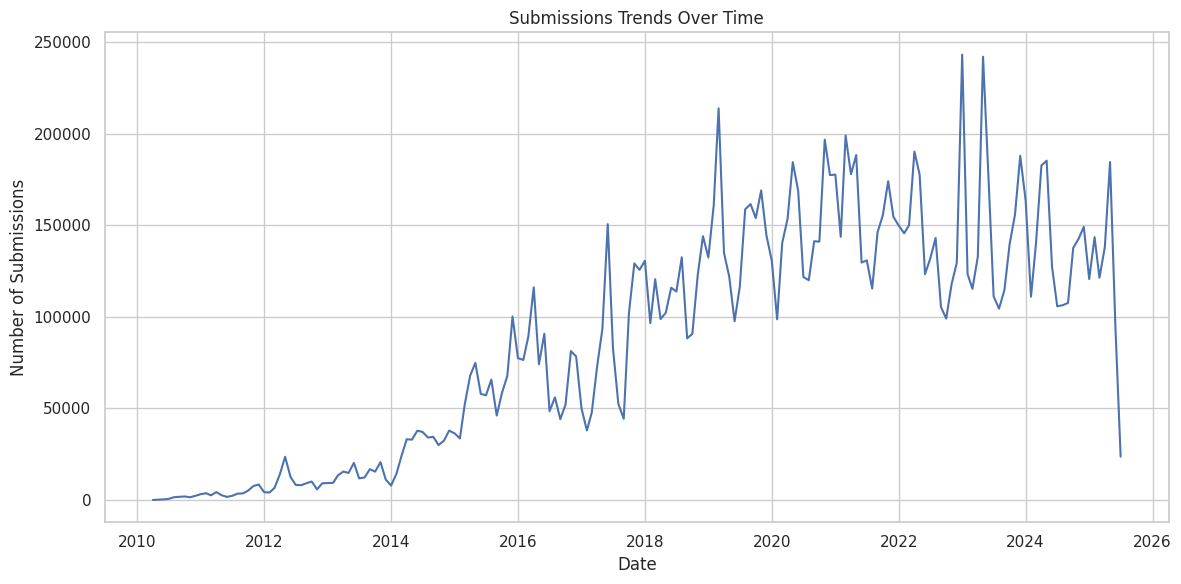

In [70]:
# Make sure SubmissionDate is datetime
submissions_with_comp['SubmissionDate'] = pd.to_datetime(submissions_with_comp['SubmissionDate'])

# Extract Year-Month
submissions_with_comp['YearMonth'] = submissions_with_comp['SubmissionDate'].dt.to_period('M')

# Count submissions per month
subs_over_time = submissions_with_comp.groupby('YearMonth').size().reset_index(name='NumSubmissions')

# Convert YearMonth back to datetime for plotting
subs_over_time['YearMonth'] = subs_over_time['YearMonth'].dt.to_timestamp()

# Plot submissions over time
plt.figure(figsize=(12,6))
sns.lineplot(data=subs_over_time, x='YearMonth', y='NumSubmissions')
plt.xlabel('Date')
plt.ylabel('Number of Submissions')
plt.title('Submissions Trends Over Time')
plt.tight_layout()
plt.show()


# ====================================================
# 🌟 Section 12: Insights and Observations
# ====================================================

In [71]:
print("""
Insights:
----------
- The number of competitions has steadily increased since Kaggle's early years.
- Popular themes revolve around computer vision, NLP, and time series.
- Participation varies greatly: some competitions attract thousands of teams.
- Higher prizes correlate with higher participation, but the relationship is noisy.
- Submissions per team show that iterative development is central to success.
""")


Insights:
----------
- The number of competitions has steadily increased since Kaggle's early years.
- Popular themes revolve around computer vision, NLP, and time series.
- Participation varies greatly: some competitions attract thousands of teams.
- Higher prizes correlate with higher participation, but the relationship is noisy.
- Submissions per team show that iterative development is central to success.



# ====================================================
# ✅ Section 13: Conclusion
# ====================================================

In [72]:

print("This notebook demonstrates how Kaggle competitions evolve over time and highlights key dynamics of participation, iteration, and incentives. Extend this by analyzing kernel usage, forum activity, or modeling trends over time.")


This notebook demonstrates how Kaggle competitions evolve over time and highlights key dynamics of participation, iteration, and incentives. Extend this by analyzing kernel usage, forum activity, or modeling trends over time.
